In [2]:
# Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [3]:
df = pd.read_csv('HeartDisease.csv')
df.shape

(1025, 14)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
target_count = df['target'].value_counts()
target_count

target
1    526
0    499
Name: count, dtype: int64

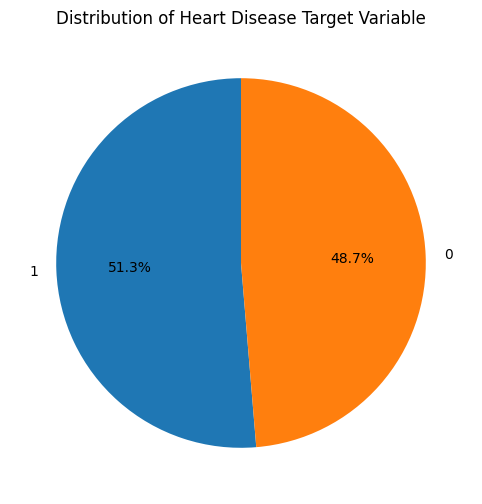

In [8]:
plt.figure(figsize=(8, 6))

plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Heart Disease Target Variable')
plt.show()

<hr>

In [9]:
# Splitting the dataset into training and testing sets
X = df.drop('target', axis=1)
Y = df['target']

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1025, 13)
Shape of Y: (1025,)


In [10]:
# Normalizing the data/features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe().round(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.805,-1.512,-0.916,-2.148,-2.327,-0.419,-1.004,-3.397,-0.712,-0.912,-2.244,-0.732,-3.746
25%,-0.710,-1.512,-0.916,-0.663,-0.679,-0.419,-1.004,-0.744,-0.712,-0.912,-0.624,-0.732,-0.522
50%,0.173,0.662,0.056,-0.092,-0.116,-0.419,0.891,0.126,-0.712,-0.231,-0.624,-0.732,-0.522
75%,0.724,0.662,1.028,0.479,0.562,-0.419,0.891,0.734,1.404,0.620,0.995,0.239,1.090
max,2.489,0.662,1.999,3.906,6.167,2.387,2.787,2.300,1.404,4.367,0.995,3.150,1.090


In [12]:
# Splitting the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [13]:
print("Training set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_val.shape, Y_val.shape)

Training set shape: (717, 13) (717,)
Validation set shape: (308, 13) (308,)


<hr>

<h2><b>Building the MLP</b></h2>

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(13,)),
    
    tf.keras.layers.Dense(16, activation='relu', name='hidden_layer1'),
    tf.keras.layers.Dropout(0.2, name='dropout_layer1'),

    tf.keras.layers.Dense(8, activation='relu', name='hidden_layer2'),
    tf.keras.layers.Dropout(0.2, name='dropout_layer2'),

    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer1 (Dense)           │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer1 (Dropout)        │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer2 (Dense)           │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer2 (Dropout)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs = 250,
    batch_size=32  # Mini-batch gradient descent
)

Epoch 1/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5116 - loss: 0.7945 - val_accuracy: 0.5747 - val_loss: 0.6819
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5777 - loss: 0.7264 - val_accuracy: 0.6429 - val_loss: 0.6337
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6726 - loss: 0.6435 - val_accuracy: 0.6883 - val_loss: 0.6023
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7064 - loss: 0.5982 - val_accuracy: 0.7240 - val_loss: 0.5774
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7140 - loss: 0.5870 - val_accuracy: 0.7305 - val_loss: 0.5549
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7191 - loss: 0.5670 - val_accuracy: 0.7565 - val_loss: 0.5345
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7249 - loss: 0.5692 - val_accuracy: 0.7630 - val_loss: 0.5180
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7585 - loss: 0.5435 - val_accuracy: 0.7987 -

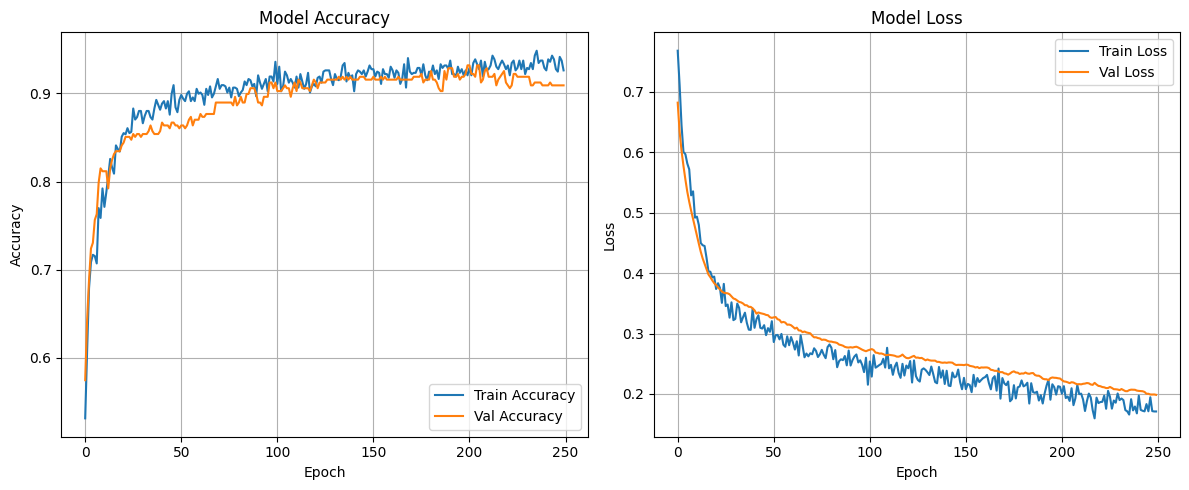

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Val Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot loss
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Val Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# Layout and show
plt.tight_layout()
plt.show()

<hr>

## <b>Sample Prediction</b>

In [20]:
sample = np.array([[52,1,0,128,204,1,1,196,1,1,0.5,0,0]])  # Example input
sample_normalized = scaler.transform(sample)  

prediction = model.predict(sample_normalized)

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.51754016]]


c:\Users\Abdul Rehman Tahir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
if(prediction[0][0] > 0.5):
    print("Have Heart Disease")
else:
    print("No Heart Disease")


Have Heart Disease


<hr>